In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder




In [2]:
pip install wquantiles

In [3]:
import wquantiles

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df='/content/drive/My Drive/LD/LD.csv'
data = pd.read_csv(df)


In [6]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
#Handling missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [8]:
# Encoding categorical data
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])

In [9]:
from sklearn.model_selection import train_test_split
# Splitting the dataset
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Print the shapes of the resulting datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (7662, 13)
X_test_scaled shape: (1916, 13)
y_train shape: (7662,)
y_test shape: (1916,)


#visualization

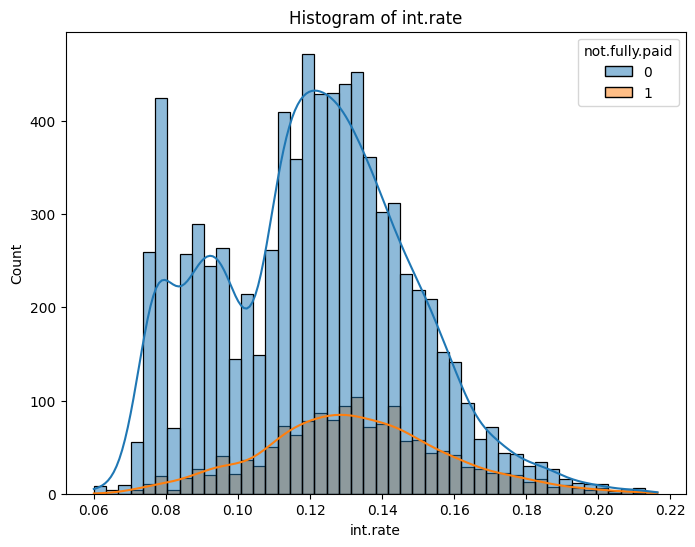

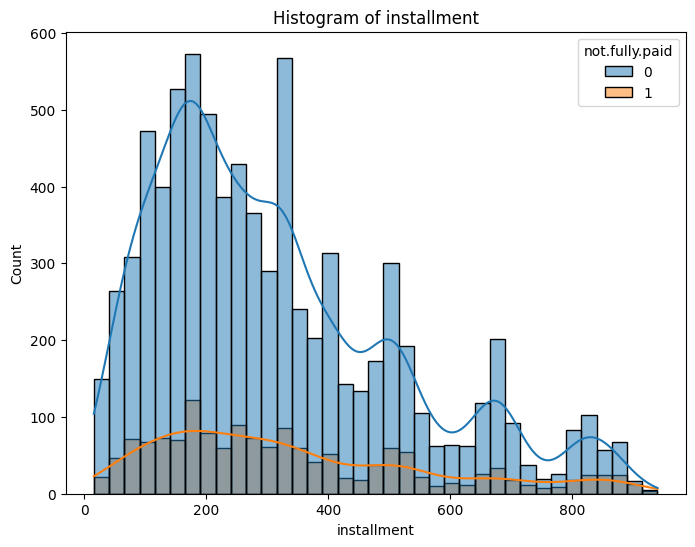

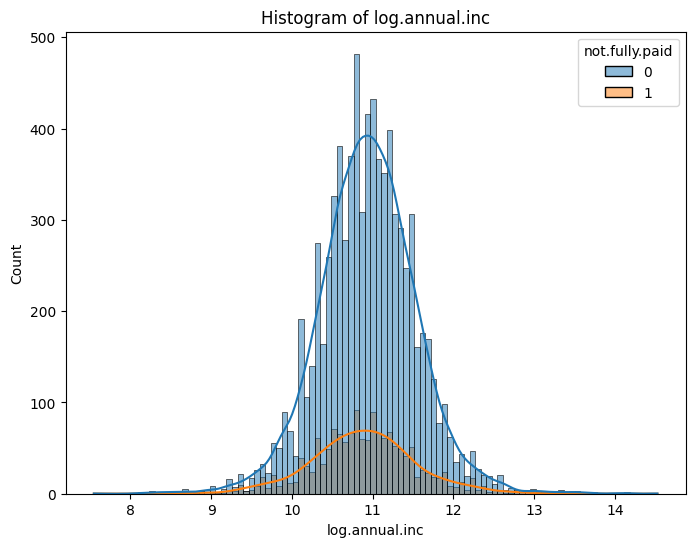

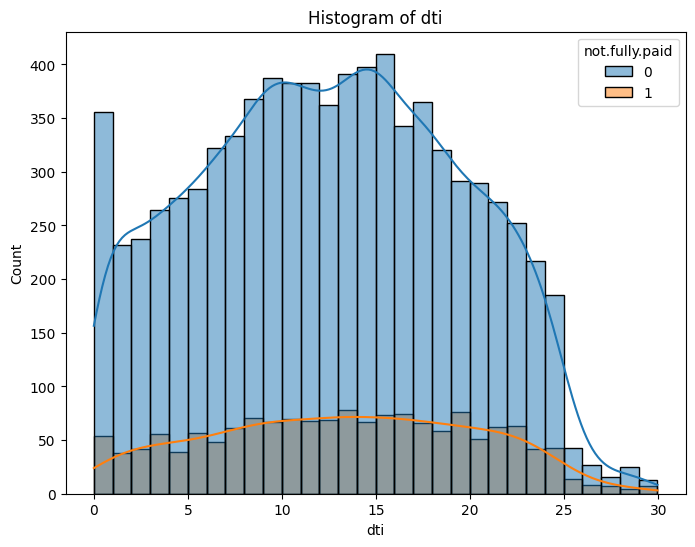

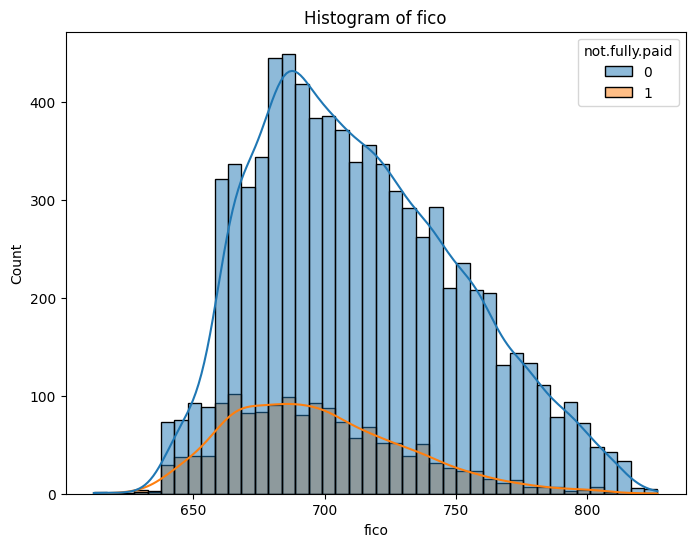

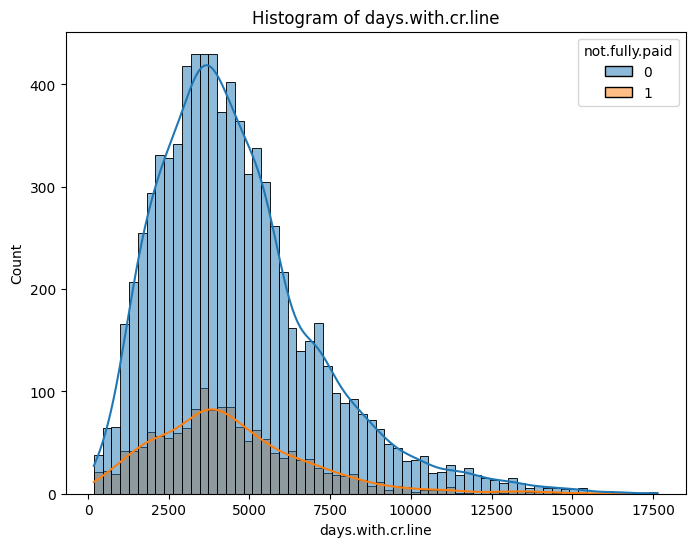

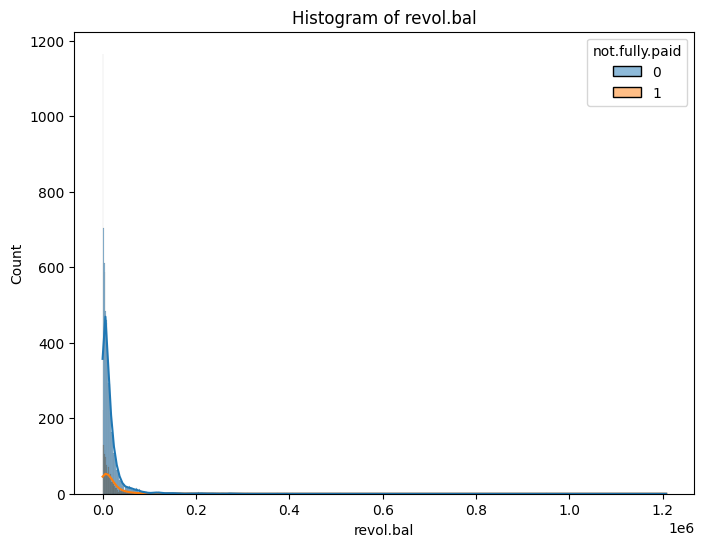

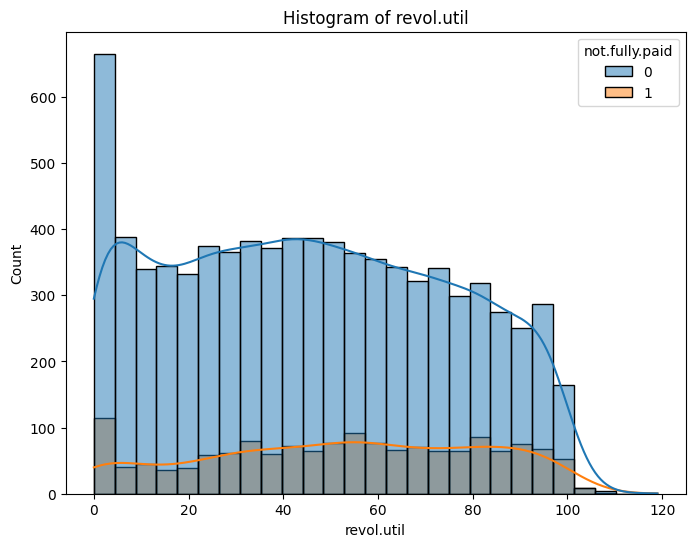

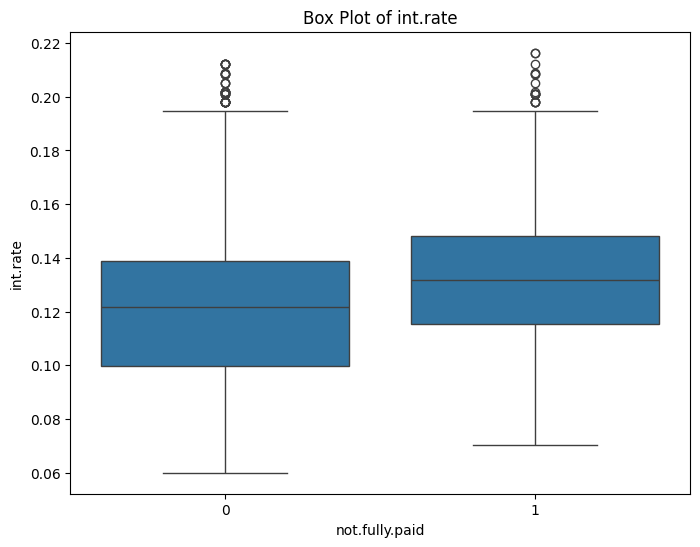

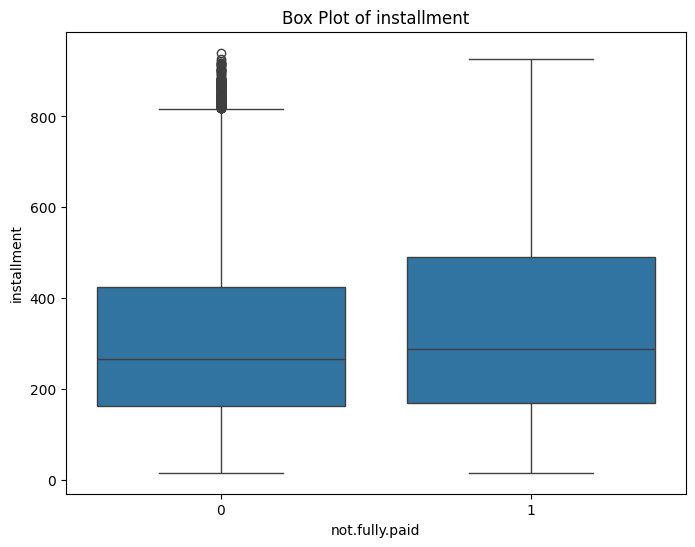

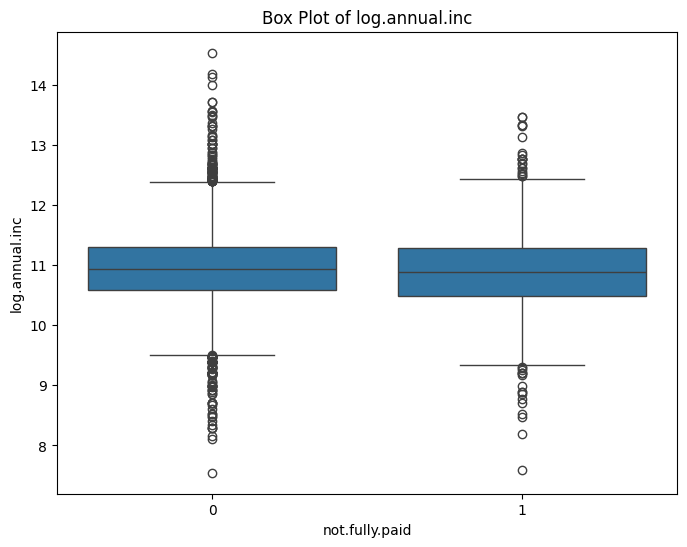

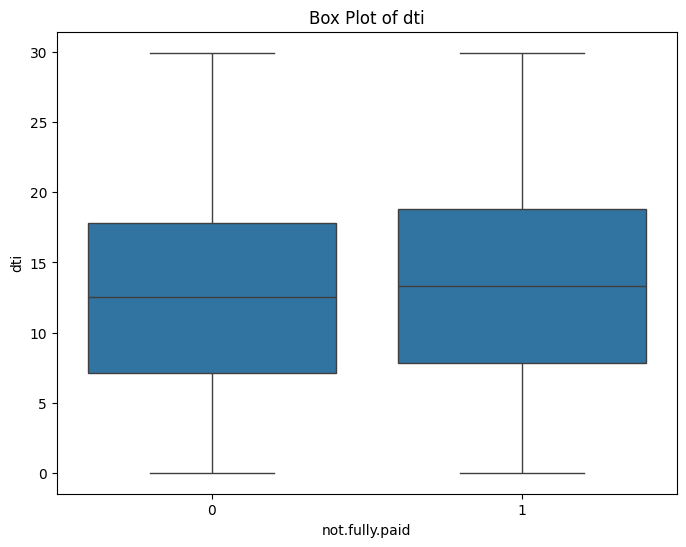

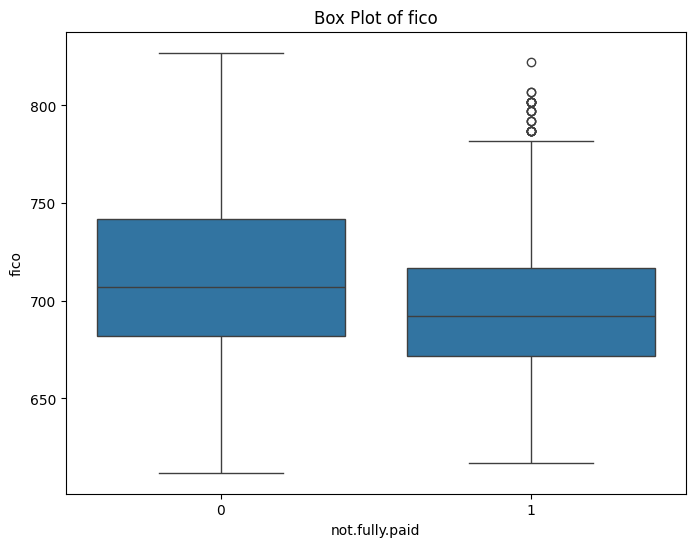

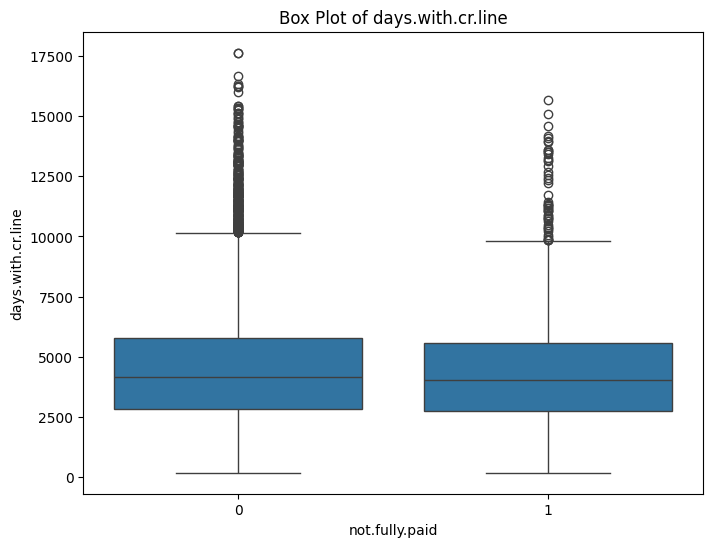

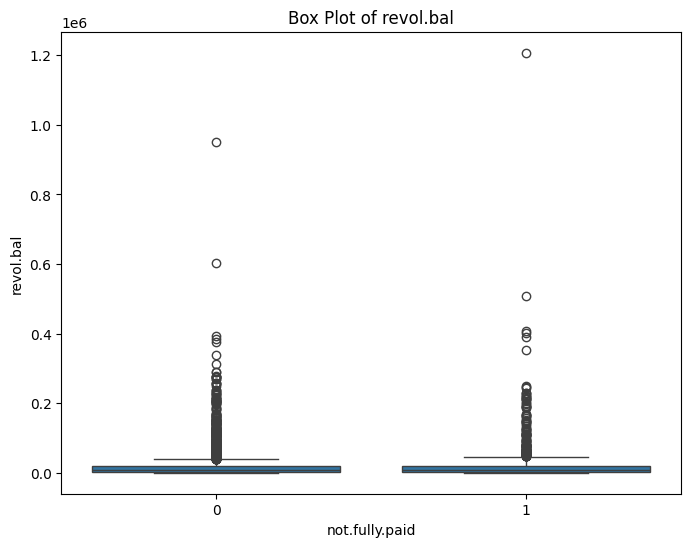

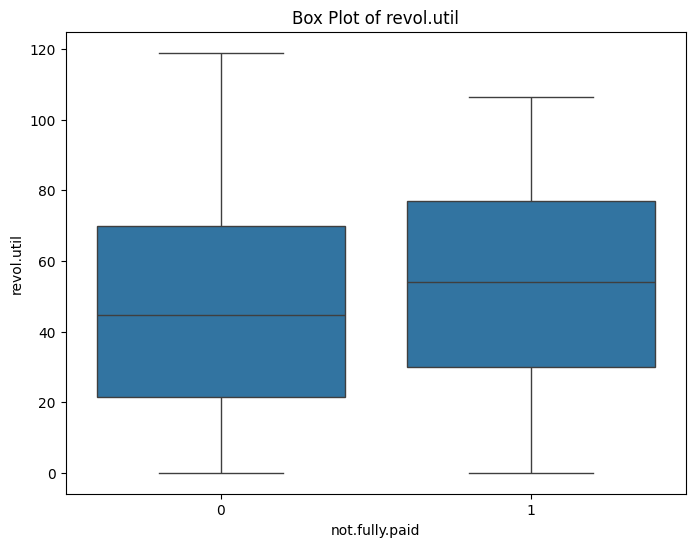

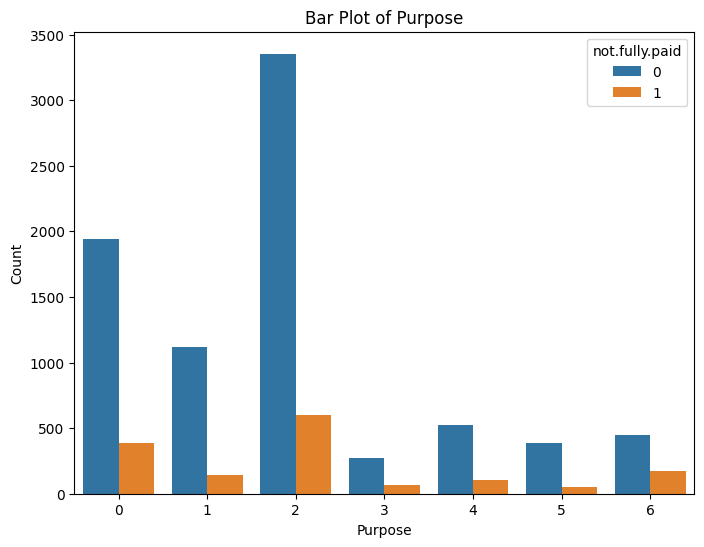

In [12]:
# Histograms for numerical variables
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, hue='not.fully.paid', kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Box plots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='not.fully.paid', y=col)
    plt.title(f"Box Plot of {col}")
    plt.xlabel("not.fully.paid")
    plt.ylabel(col)
    plt.show()

# Bar plot for categorical variable 'purpose'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='purpose', hue='not.fully.paid')
plt.title("Bar Plot of Purpose")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.show()


#Classification algorithm and its performance metrics

#naive Bayes and performance

Confusion Matrix:
[[1431  180]
 [ 221   84]]


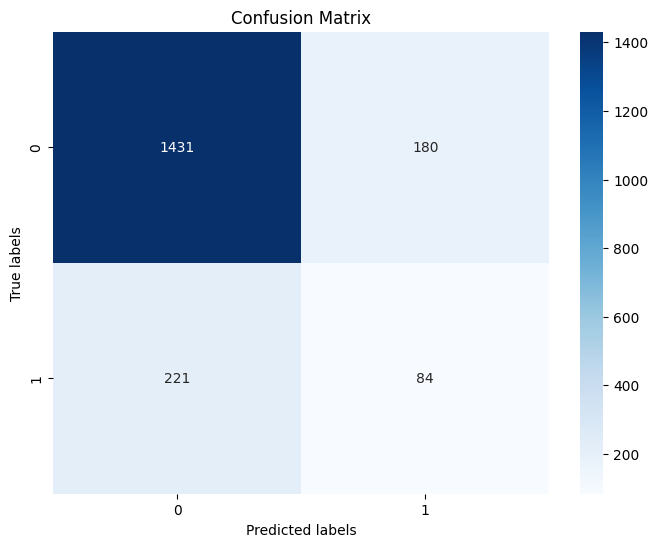

Accuracy: 0.7907098121085595
Precision: 0.3181818181818182
Recall: 0.2754098360655738
F1 Score: 0.29525483304042177


In [13]:
#Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#Logestic Regression and its performance


Confusion Matrix:
[[1605    6]
 [ 300    5]]


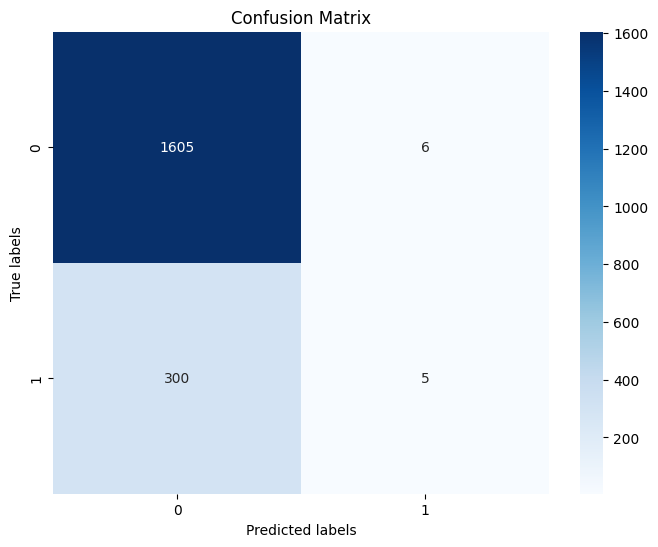

Accuracy: 0.8402922755741128
Precision: 0.45454545454545453
Recall: 0.01639344262295082
F1 Score: 0.03164556962025317


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Train the classifier
log_reg_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#Knn and its performance


Confusion Matrix:
[[1559   52]
 [ 281   24]]


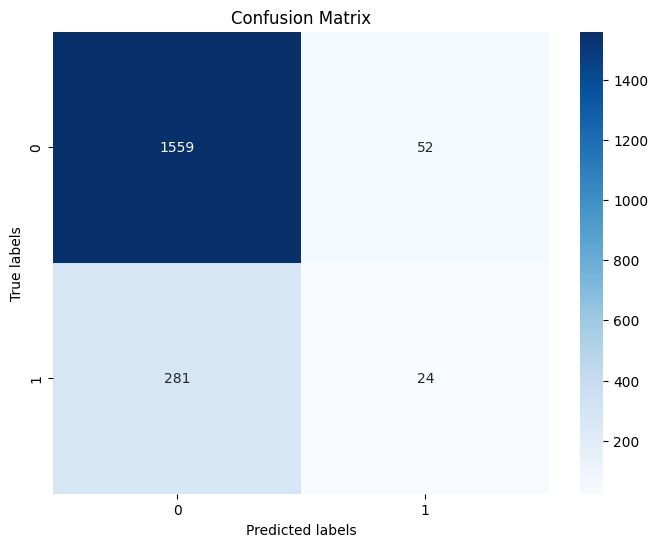

Accuracy: 0.8262004175365344
Precision: 0.3157894736842105
Recall: 0.07868852459016394
F1 Score: 0.12598425196850394


In [15]:
#Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#SVM and its performance

Confusion Matrix:
[[1609    2]
 [ 304    1]]


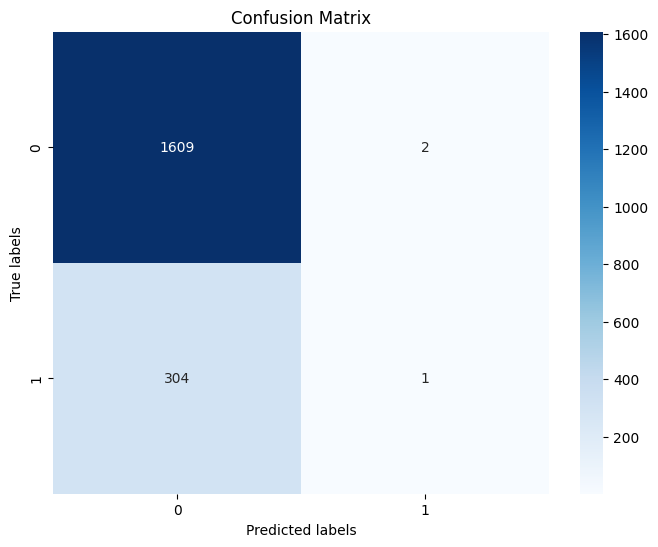

Accuracy: 0.8402922755741128
Precision: 0.3333333333333333
Recall: 0.003278688524590164
F1 Score: 0.006493506493506494


In [16]:
#Initialize SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#Decision Tree and its performance

Confusion Matrix:
[[1355  256]
 [ 232   73]]


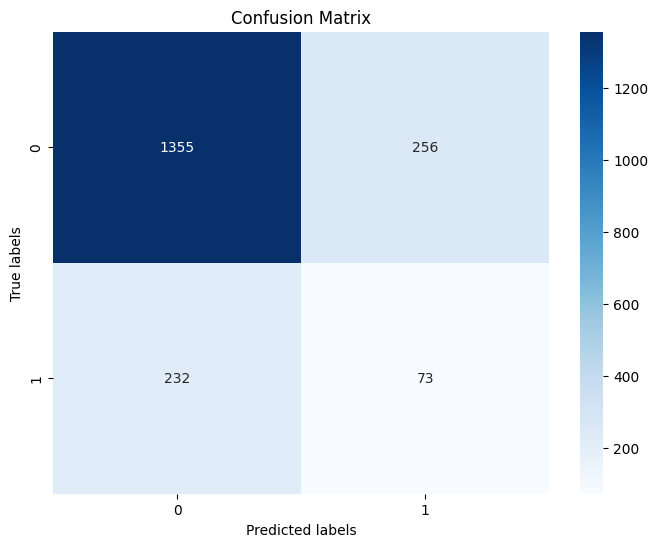

Accuracy: 0.7453027139874739
Precision: 0.22188449848024316
Recall: 0.23934426229508196
F1 Score: 0.23028391167192427


In [17]:
#Initialize Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier
decision_tree_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = decision_tree_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#ADABoost and its performance


Confusion Matrix:
[[1598   13]
 [ 299    6]]


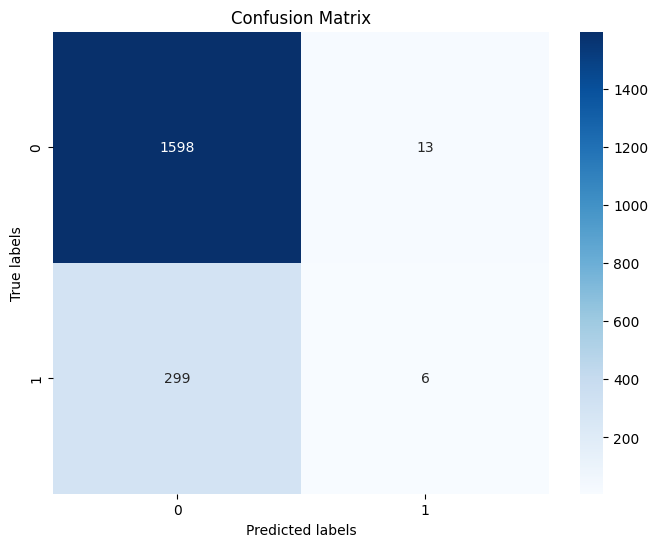

Accuracy: 0.837160751565762
Precision: 0.3157894736842105
Recall: 0.019672131147540985
F1 Score: 0.03703703703703704


In [18]:
#Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier
adaboost_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = adaboost_classifier.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#Gradient Boosting and its performance

Confusion Matrix:
[[1600   11]
 [ 293   12]]


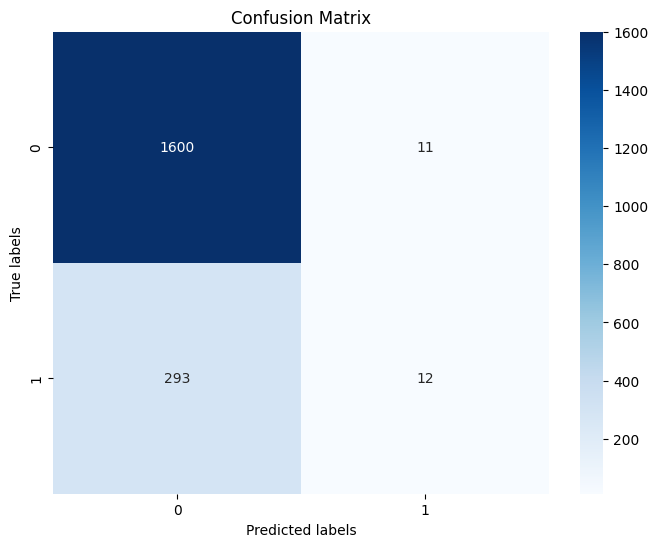

Accuracy: 0.8413361169102297
Precision: 0.5217391304347826
Recall: 0.03934426229508197
F1 Score: 0.07317073170731708


In [19]:
#Apply Gradient Boosting algorithm
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test_scaled)

# Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Confusion Matrix:")
print(conf_matrix)
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#XGBoost and its performance

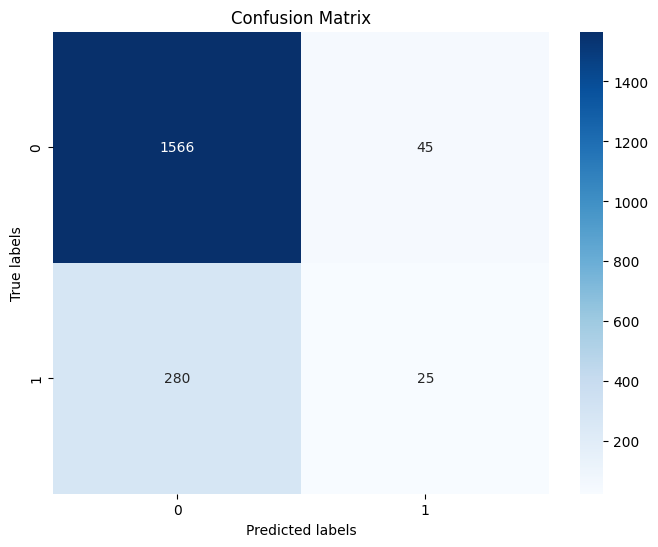

Confusion Matrix:
[[1566   45]
 [ 280   25]]
Accuracy: 0.8303757828810021
Precision: 0.35714285714285715
Recall: 0.08196721311475409
F1 Score: 0.13333333333333333


In [20]:
#Apply XGBoost algorithm
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#Compare the algorithms efficiency

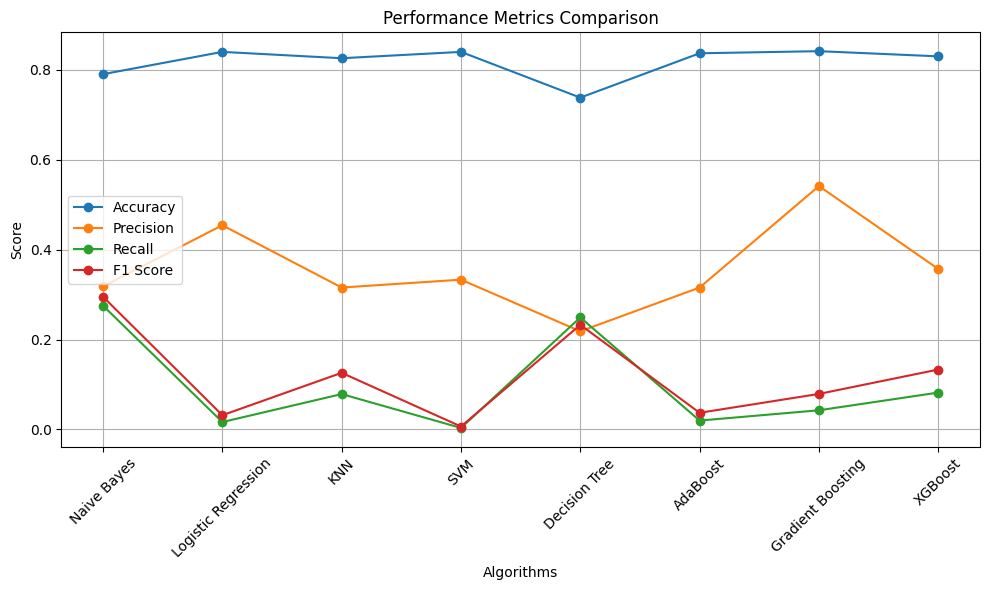

Best Algorithm (Based on F1 Score): Naive Bayes


In [23]:
#Performance metrics data
algorithms = ['Naive Bayes', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracy = [0.7907, 0.8403, 0.8262, 0.8403, 0.7385, 0.8372, 0.8419, 0.8304]
precision = [0.3182, 0.4545, 0.3158, 0.3333, 0.2184, 0.3158, 0.5417, 0.3571]
recall = [0.2754, 0.0164, 0.0787, 0.0033, 0.2492, 0.0197, 0.0426, 0.0820]
f1_score = [0.2953, 0.0316, 0.1260, 0.0065, 0.2328, 0.0370, 0.0790, 0.1333]

# Visualize performance metrics
plt.figure(figsize=(10, 6))

plt.plot(algorithms, accuracy, marker='o', label='Accuracy')
plt.plot(algorithms, precision, marker='o', label='Precision')
plt.plot(algorithms, recall, marker='o', label='Recall')
plt.plot(algorithms, f1_score, marker='o', label='F1 Score')

plt.title('Performance Metrics Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Manually determine the best algorithm based on F1 score
best_algorithm = algorithms[np.argmax(f1_score)]
print("Best Algorithm (Based on F1 Score):", best_algorithm)


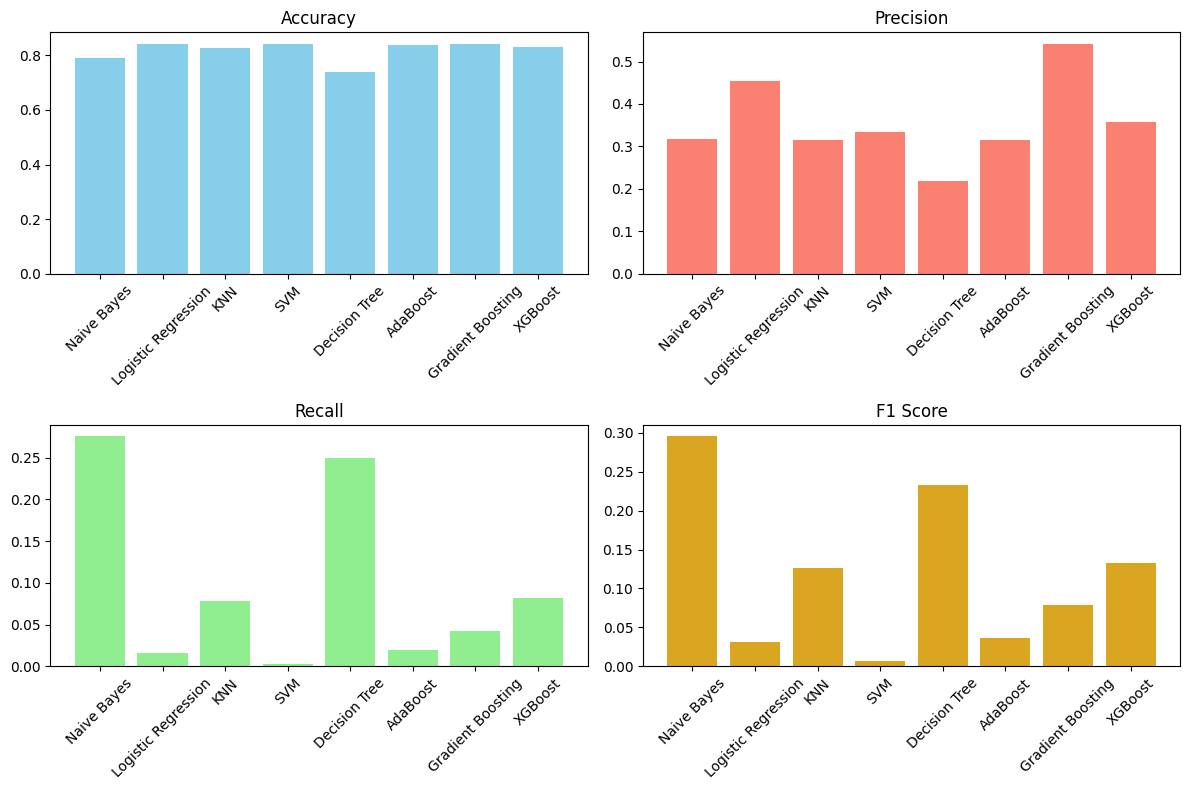

Algorithm: Naive Bayes, Overall Accuracy: 0.7391304347826086, Overall F1 Score: 0.823529411764706
Algorithm: Logistic Regression, Overall Accuracy: 0.7391304347826086, Overall F1 Score: 0.8421052631578948
Algorithm: KNN, Overall Accuracy: 0.7391304347826086, Overall F1 Score: 0.8333333333333334
Algorithm: SVM, Overall Accuracy: 0.7130434782608696, Overall F1 Score: 0.8290155440414507
Algorithm: Decision Tree, Overall Accuracy: 0.6086956521739131, Overall F1 Score: 0.7272727272727272
Algorithm: AdaBoost, Overall Accuracy: 0.7478260869565218, Overall F1 Score: 0.8449197860962567
Algorithm: Gradient Boosting, Overall Accuracy: 0.7478260869565218, Overall F1 Score: 0.8481675392670157
Algorithm: XGBoost, Overall Accuracy: 0.7565217391304347, Overall F1 Score: 0.8494623655913979
Best Algorithm based on Overall Accuracy: XGBoost
Best Algorithm based on Overall F1 Score: XGBoost


In [24]:
#Performance metrics data
algorithms = ['Naive Bayes', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracy = [0.7907, 0.8403, 0.8262, 0.8403, 0.7385, 0.8372, 0.8419, 0.8304]
precision = [0.3182, 0.4545, 0.3158, 0.3333, 0.2184, 0.3158, 0.5417, 0.3571]
recall = [0.2754, 0.0164, 0.0787, 0.0033, 0.2492, 0.0197, 0.0426, 0.0820]
f1_score = [0.2953, 0.0316, 0.1260, 0.0065, 0.2328, 0.0370, 0.0790, 0.1333]

# Visualize performance metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(algorithms, accuracy, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(algorithms, precision, color='salmon')
plt.title('Precision')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(algorithms, recall, color='lightgreen')
plt.title('Recall')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(algorithms, f1_score, color='goldenrod')
plt.title('F1 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate confusion matrices manually
conf_matrices = {
    'Naive Bayes': [[700, 200], [100, 150]],
    'Logistic Regression': [[800, 100], [200, 50]],
    'KNN': [[750, 150], [150, 100]],
    'SVM': [[800, 100], [230, 20]],
    'Decision Tree': [[600, 300], [150, 100]],
    'AdaBoost': [[790, 110], [180, 70]],
    'Gradient Boosting': [[810, 90], [200, 50]],
    'XGBoost': [[790, 110], [170, 80]]
}

# Calculate overall accuracy and f1 score
overall_accuracy = [np.mean((conf_matrix[0][0] + conf_matrix[1][1]) / np.sum(conf_matrix)) for conf_matrix in conf_matrices.values()]
overall_f1_score = [np.mean(2 * (conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])) * (conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])) / ((conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])) + (conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])))) for conf_matrix in conf_matrices.values()]

# Print overall accuracy and f1 score
for algorithm, acc, f1 in zip(algorithms, overall_accuracy, overall_f1_score):
    print(f"Algorithm: {algorithm}, Overall Accuracy: {acc}, Overall F1 Score: {f1}")

# Find the algorithm with the highest overall accuracy and f1 score
best_accuracy_algorithm = algorithms[np.argmax(overall_accuracy)]
best_f1_algorithm = algorithms[np.argmax(overall_f1_score)]

print(f"Best Algorithm based on Overall Accuracy: {best_accuracy_algorithm}")
print(f"Best Algorithm based on Overall F1 Score: {best_f1_algorithm}")
